# In this lab, we will review some of the basics of numpy and matplotlib that we discussed previously. We will then introduce several new libraries including pandas and scikit-learn which are routinely used for data science and machine learning. Finally, we'll do a small exercise working with real data. ####

In [4]:
!pip install seaborn

Lets import these libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os #operating system. used to interact with and navigate through directories
import pandas as pd
import sklearn

## Numpy Review

Numpy is the standard library for working with arrays of data.

In [6]:
#Make an array of numbers

#Integer spacing
x = np.arange(0, 11, 1)
print('Integer spaced', x)

#Linearly spaced
x_new = np.linspace(0, 10, 21)
print('Linearly spaced', x_new)

#array of ones
x_ones = np.ones(11)

#Matrices
A = np.array([[1,2],[3,4]])
I = np.eye(3) #Identity matrix
print('Identity Matrix \n', I)
ones = np.ones((3,3))

Integer spaced [ 0  1  2  3  4  5  6  7  8  9 10]
Linearly spaced [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
Identity Matrix 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [7]:
#Indexing (pulling items from an array)

#Need to know how many dimensions are in the array to access a particular element
print('Shape is:', x.shape)

#Lets get an element from the array
print('The item with index 3 is', x[3])
print('Is x[3] equal to 2?:  ', x[3] == 2)

#What if I want more than one item from the array
print('Indices 3-6', x[3:6])

#Counting backwards
print('End of the array', x[-1])

#What if I want every item?
print('Every Item', x[:])

#What if I have a higher dimensional array
print('Shape of ones array is', A.shape)

#Get an item from the 2D array
print('A[1,1]', A[1,1])

#Get an entire row
print('First Row', A[0,:])

#Get an entire column
print('Second Column', A[:,1])

Shape is: (11,)
The item with index 3 is 3
Is x[3] equal to 2?:   False
Indices 3-6 [3 4 5]
End of the array 10
Every Item [ 0  1  2  3  4  5  6  7  8  9 10]
Shape of ones array is (2, 2)
A[1,1] 4
First Row [1 2]
Second Column [2 4]


## Exercise

In [8]:
#Make a 3x3 identity matrix. 
#Insert the number two in the first row, second column.
#Multiply the last element in the last row by 3
#Scale the entire matrix by 2
#Add to the matrix an additional Identity matrix
#Print the result

#Solution
#[[3. 4. 0.]
# [0. 3. 0.]
# [0. 0. 7.]]

I = np.eye(3)
I[0,0] = 3
I[0,1] = 4
I[1,1] = 3
I[2,2] = 7
print(I)

[[3. 4. 0.]
 [0. 3. 0.]
 [0. 0. 7.]]


## Matplotlib Review

Matplotlib is a Matlab-like plotting library

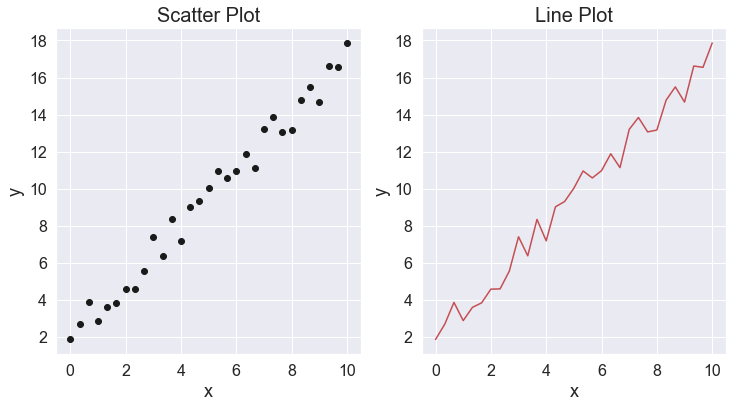

In [9]:
#First, lets make some data for an independent variable
x = np.linspace(0, 10, 31)

#Let's create a line
y = 1.5*x+1.0

#Add some noise to it
y += 2*np.random.rand(y.shape[0])

#Now we're ready to plot it

#Create some subplots
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))

#Plot the data
axs[0].scatter(x,y, color = 'k', label='scatter')
axs[0].set_title('Scatter Plot', size = 20)

axs[1].plot(x,y,'r', label = 'line')
axs[1].set_title('Line Plot', size = 20)

#Set common axes parameters using a for loop
for ax in axs:
    ax.tick_params(axis = 'x', labelsize = 16)
    ax.tick_params(axis = 'y', labelsize = 16)
    
    ax.set_xlabel('x', size = 18)
    ax.set_ylabel('y', size = 18)

# Exercise

Newtown's law for the force of gravity between two point masses is

$$F = \frac{GmM}{r^2}$$

where $G\approx6.6743*10^{-11}$ $\textrm{m}^3\textrm{kg}^{-1}\textrm{s}^{-2}$, $m, \textrm{and } M$ are the mass of the first and second particles respectively, and $r$ is the Euclidean distance between the two masses.

Your tasks:

1) Create a numpy array of values of r from (0,10] hint: np.linspace \
2) Use the function below to compute the force due to gravity. Store this in a variable\
3) Change the value of m or M and recompute using another variable\
4) Plot your results on the same plot

In [10]:
def force_gravity(r, m=1, M=2, G=6.6743e-11):
    f_g = (G*m*M)/r**2
    return f_g

In [11]:
r_values = np.arange(1,11)
forces = []
forces2 = []

for r_value in r_values:
    force = force_gravity(r_value)
    forces.append(force)
    
for r_value in r_values:
    force2 = force_gravity(r_value, m=2, M=5)
    forces2.append(force2)

Text(0, 0.5, 'force')

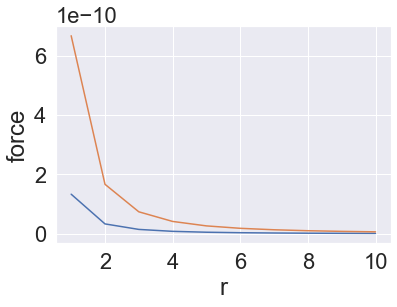

In [12]:
plt.plot(r_values, forces)
plt.plot(r_values, forces2)
plt.xlabel('r')
plt.ylabel('force')

# Pandas (New Library)

What is pandas? Pandas is used to work with tabular data (data stored in tables). Data scientists typically query data from a structured database using SQL and process it with other software. Pandas is a convienent 'other software' for data wrangling in python. 

The basic structure you'll work with is a DataFrame. Crudely speaking, you can think of this as a python excel spreadsheet. You query data, plot data, calculate summary statistics, and more using pandas. The full documentation is available at https://pandas.pydata.org/docs/

Let's learn some basics first. 

In [13]:
pwd

'C:\\Users\\baage\\Desktop\\Choi_MSI\\7_수업_강의_강좌\\20210825 UT Fall\\Intro to ML\\Week2'

In [14]:
#edit to the directory that holds your spreadsheet
#os.chdir('path/to/your/directory/with/spreadsheet')
# os.chdir('C:/Users\\baage\\Desktop\\Choi_MSI\\7_수업_강의_강좌\\20210825 UT Fall\\Intro to ML\\Week2\\completion')

#Read an excel spreadsheet into a pandas dataframe
df_completion = pd.read_csv("completion.csv")

#Print the first 5 rows
df_completion.head()

,API,bottom,file_number,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,ft_per_stage,lateral_length,max_treat_press,max_treat_rate,propp_lbs,propp_lbs_per_ft,stages,top,treatment_date
0,33061029770000,20171,27710,63941,6,2685522,273,280,9806,8239,46.3,3222497,328,35,10365,3/14/15
1,33053065160000,20490,30120,55859,6,2346078,260,300,9020,8820,41.4,3360688,372,30,11470,2/27/15
2,33061032390000,15774,29063,46076,9,1935192,379,221,5102,8982,89.6,1676744,328,23,10672,2/16/15
3,33025026550000,20688,29220,67183,7,2821686,307,262,9190,8327,44.1,4035990,439,35,11498,2/15/15
4,33053064110000,21157,29814,59245,2,2488290,124,666,20007,9171,40.6,3522422,176,30,1150,2/15/15


### Data Cleanup

> yc: **매우중요**

In [15]:
#Do we need to remove nans?

#Heres how we can find out whether or not we have Nans in the data
nan_index = df_completion.isna()
print(nan_index.sum()) #add up the number of Trues over each column
nan_index #displays the dataframe in human readable format

#It looks like we have no Nans. In the real world, we might have to deal with Nans
#You can clear Nans with df_completion.dropna(how='any', axis=0)

API                 0
bottom              0
file_number         0
fluid_bbl           0
fluid_bbl_per_ft    0
fluid_gal           0
fluid_gal_per_ft    0
ft_per_stage        0
lateral_length      0
max_treat_press     0
max_treat_rate      0
propp_lbs           0
propp_lbs_per_ft    0
stages              0
top                 0
treatment_date      0
dtype: int64


,API,bottom,file_number,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,ft_per_stage,lateral_length,max_treat_press,max_treat_rate,propp_lbs,propp_lbs_per_ft,stages,top,treatment_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9660,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9661,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9662,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Indexing via dictionary-like syntax vs. integer

In [16]:
#Dictionary-like indexing
#Notice that there is a row and column index, just like a numpy array
df_completion.loc[:,['fluid_gal_per_ft','max_treat_rate', 'max_treat_press']]

,fluid_gal_per_ft,max_treat_rate,max_treat_press
0,273,46.3,8239
1,260,41.4,8820
2,379,89.6,8982
3,307,44.1,8327
4,124,40.6,9171
...,...,...,...
9659,87,0.0,4451
9660,147,0.0,0
9661,73,0.0,0
9662,1,61.0,8908


> 아래와 같이 하면 하나의 열만 선택할 수 있음. 따라서 `.loc`쓰는게 좋음

In [17]:
df_completion['fluid_gal_per_ft']

0       273
1       260
2       379
3       307
4       124
       ... 
9659     87
9660    147
9661     73
9662      1
9663    108
Name: fluid_gal_per_ft, Length: 9664, dtype: int64

> col과 row의 index로 데이터를 얻으려면 `.iloc`을 사용

In [18]:
# We could also access columns of the table using numeric indices
df_completion.iloc[:,[0,1,3]]

,API,bottom,fluid_bbl
0,33061029770000,20171,63941
1,33053065160000,20490,55859
2,33061032390000,15774,46076
3,33025026550000,20688,67183
4,33053064110000,21157,59245
...,...,...,...
9659,33061008520000,19327,18957
9660,33025007640000,15440,15117
9661,33061008810000,20380,17521
9662,33053029190000,19530,208


array([[<AxesSubplot:title={'center':'API'}>,
        <AxesSubplot:title={'center':'bottom'}>,
        <AxesSubplot:title={'center':'file_number'}>,
        <AxesSubplot:title={'center':'fluid_bbl'}>],
       [<AxesSubplot:title={'center':'fluid_bbl_per_ft'}>,
        <AxesSubplot:title={'center':'fluid_gal'}>,
        <AxesSubplot:title={'center':'fluid_gal_per_ft'}>,
        <AxesSubplot:title={'center':'ft_per_stage'}>],
       [<AxesSubplot:title={'center':'lateral_length'}>,
        <AxesSubplot:title={'center':'max_treat_press'}>,
        <AxesSubplot:title={'center':'max_treat_rate'}>,
        <AxesSubplot:title={'center':'propp_lbs'}>],
       [<AxesSubplot:title={'center':'propp_lbs_per_ft'}>,
        <AxesSubplot:title={'center':'stages'}>,
        <AxesSubplot:title={'center':'top'}>, <AxesSubplot:>]],
      dtype=object)

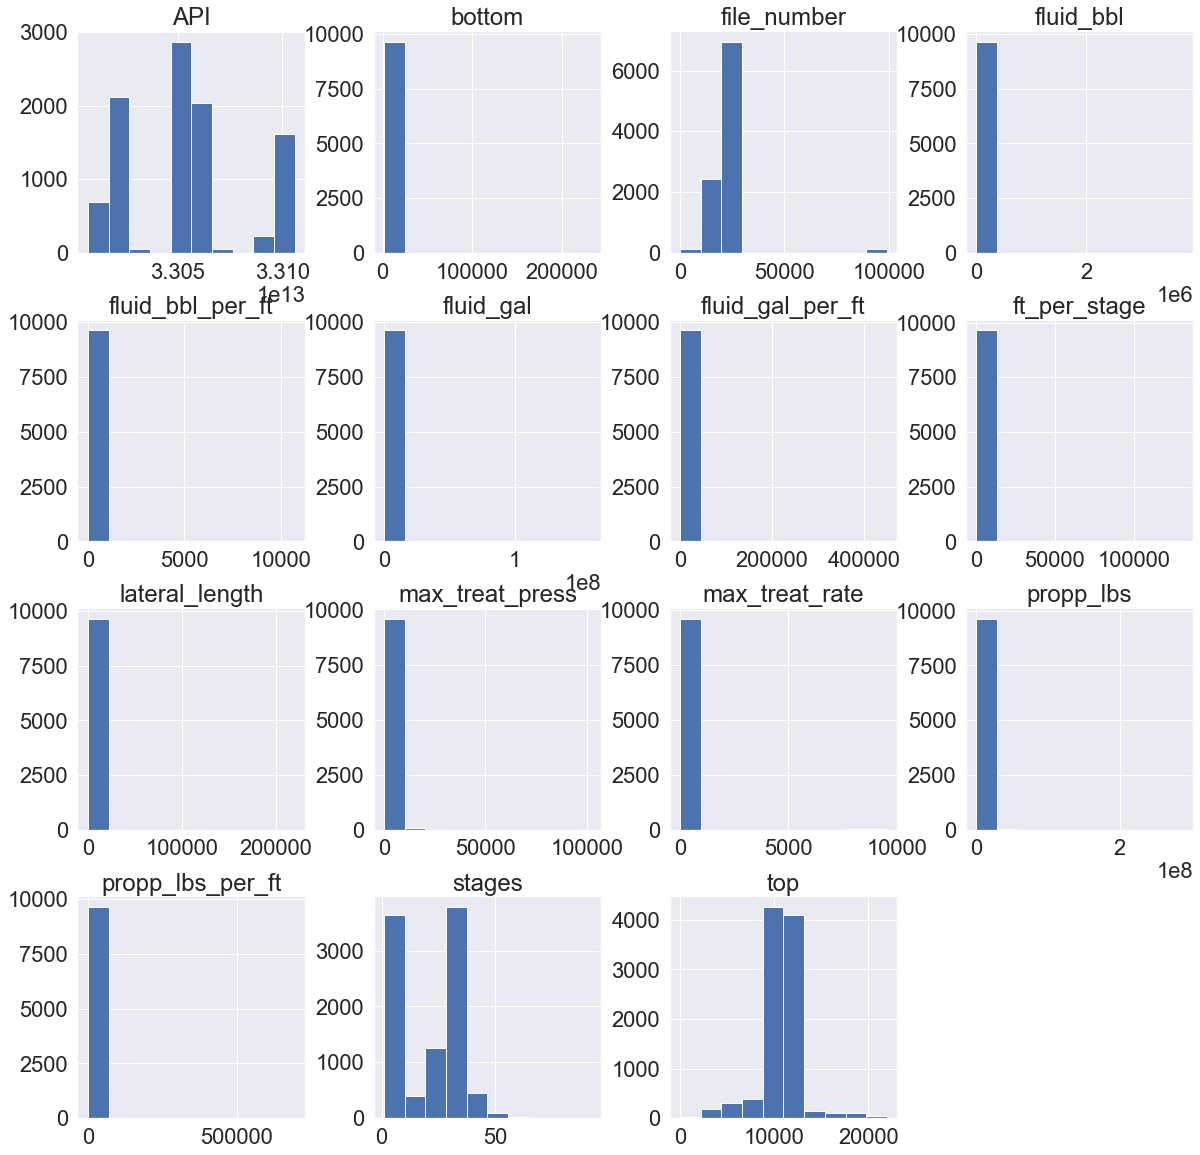

In [19]:
#Some numerical processing/statistics

#We can look for extreme outliers by plotting histograms of 
df_completion.hist(figsize = (20,20))

In [20]:
#At a glance, the data look good. But let's take a closer look

#Create an array of booleans which are True where fluid_bbl > 1e6
indices = df_completion.loc[:,'fluid_bbl']  > 1e6
print('Boolean Array Indexing \n', indices)

df_completion.loc[indices, 'fluid_bbl']

#We can see that there are some possible outliers. In practice, we might clean these up by removing them. 
#Or they could be real data. This would be a good place time to consult with an industry expert.

Boolean Array Indexing 
 0       False
1       False
2       False
3       False
4       False
        ...  
9659    False
9660    False
9661    False
9662    False
9663    False
Name: fluid_bbl, Length: 9664, dtype: bool


118     1196868
361     1303300
597     2751811
851     1125213
1073    3766323
2168    2265232
3977    1514920
Name: fluid_bbl, dtype: int64

In [21]:
#We can also use pandas to get summary statistics

#Compute the standard deviation of the fluid_gal column
df_completion.loc[:,'fluid_gal'].median()

2000565.0

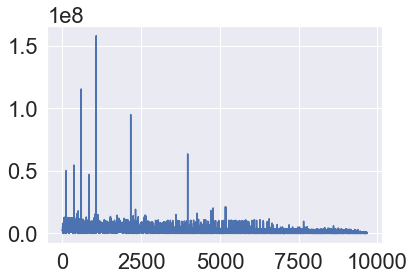

In [22]:
#We can also plot the data like this
data = df_completion.loc[:,'fluid_gal'].plot()

# Exercise

From the Dataframe, select max_treat_press for values less than 20000. Make a plot of this data. Compute some summary statistics (e.g. mean, median, std, var, etc.)

<AxesSubplot:>

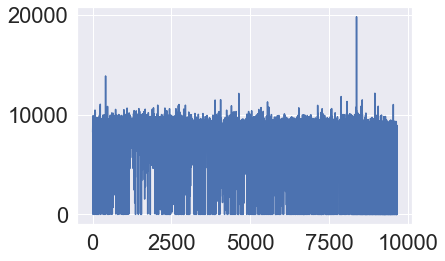

In [23]:
indices = df_completion.loc[:,'max_treat_press'] < 20000
df_completion.loc[indices, 'max_treat_press'].plot()

In [24]:
print(indices)
print(type(indices))

0       True
1       True
2       True
3       True
4       True
        ... 
9659    True
9660    True
9661    True
9662    True
9663    True
Name: max_treat_press, Length: 9664, dtype: bool
<class 'pandas.core.series.Series'>


In [25]:
medain_maxTreatPress = df_completion.loc[:,'max_treat_press'].median()
mean_maxTreatPress = df_completion.loc[:,'max_treat_press'].mean()
std_maxTreatPress = df_completion.loc[:,'max_treat_press'].std()

print(f"median:{medain_maxTreatPress}\n mean:{mean_maxTreatPress}\n std:{std_maxTreatPress}")

median:8200.0
 mean:7234.306808774834
 std:3756.4597769183006


# SciKit Learn

SciKit Learn is one of the most popular python libraries for machine learning. Most of the algorithms we discuss in class can be implemented in scikit learn. 

In [26]:
#Let's load a toy dataset. Can we predict California house prices based on some features
#This dataset was derived from the 1990 U.S. census, 
#using one row per census block group. A block group is the smallest geographical unit for which the U.S. 
#Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).


#Features
#------------------------------
#MedInc median income in block
#HouseAge median house age in block
#AveRooms average number of rooms
#AveBedrms average number of bedrooms
#Population block population
#AveOccup average house occupancy
#Latitude house block latitude
#Longitude house block longitude

from sklearn import datasets
import pandas as pd

house_prices = sklearn.datasets.fetch_california_housing(return_X_y=False, as_frame=True)

house_prices['data'].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
house_prices

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [28]:
#Look at the target (price/100000)
house_prices['target'].head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

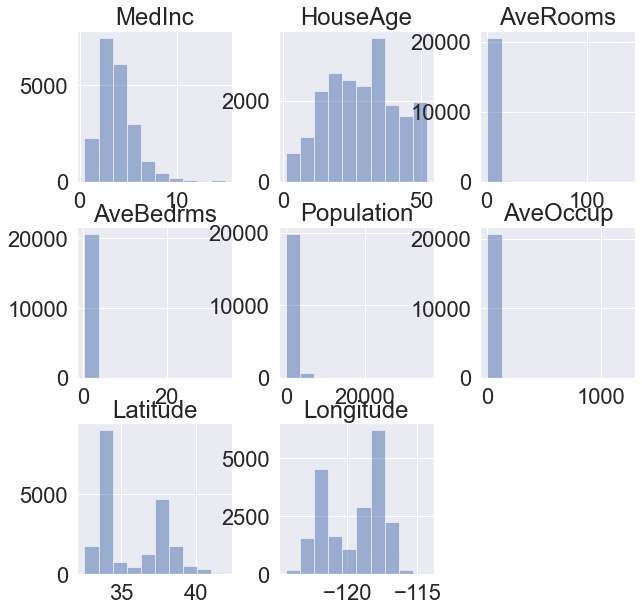

In [29]:
## Basic visualizaion

#Plot histograms of the different features in seperate subplots

#Make histograms of the data
house_prices['data'].hist(alpha = 0.5, figsize = (10,10))

### Linear regression, the first machine learning model

Can the price y be predicted just by scaling the features x?

$\min_\mathbf{w} || \mathbf{wx}-\mathbf{y} ||_2^2$

### Exercise. 

Look at the documentation for ordinary least squares. 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

Fit the house price target y with a linear combination of features x with the linear regression function.

1) Plot a histogram of the residual error y-y_pred 
2) Report the Mean Squared Error (y-y_pred))**2.sum()

MSE is: 0.5243209861846072


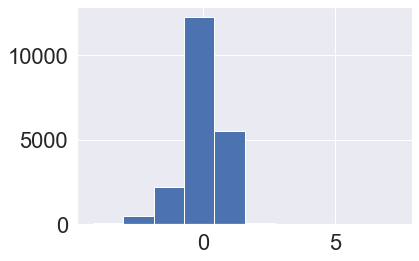

In [30]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()

x = house_prices['data']
y = house_prices['target']

fit = reg.fit(x,y)

y_pred = reg.predict(x)
plt.hist(y_pred-y)

MSE = mean_squared_error(y, y_pred)
print("MSE is:", MSE)




## Seaborn

The final library we will look at it seaborn. It wraps matplotlib to create plots for statistical visualization and QC. We use it, because it works very nicely with pandas dataframes. 

>#### Plot crossplots between columns of the housing datasest. Are any variables correlated?
yc: diagonal plots are the univariate distribution plot to show the marginal distb of the data in each column

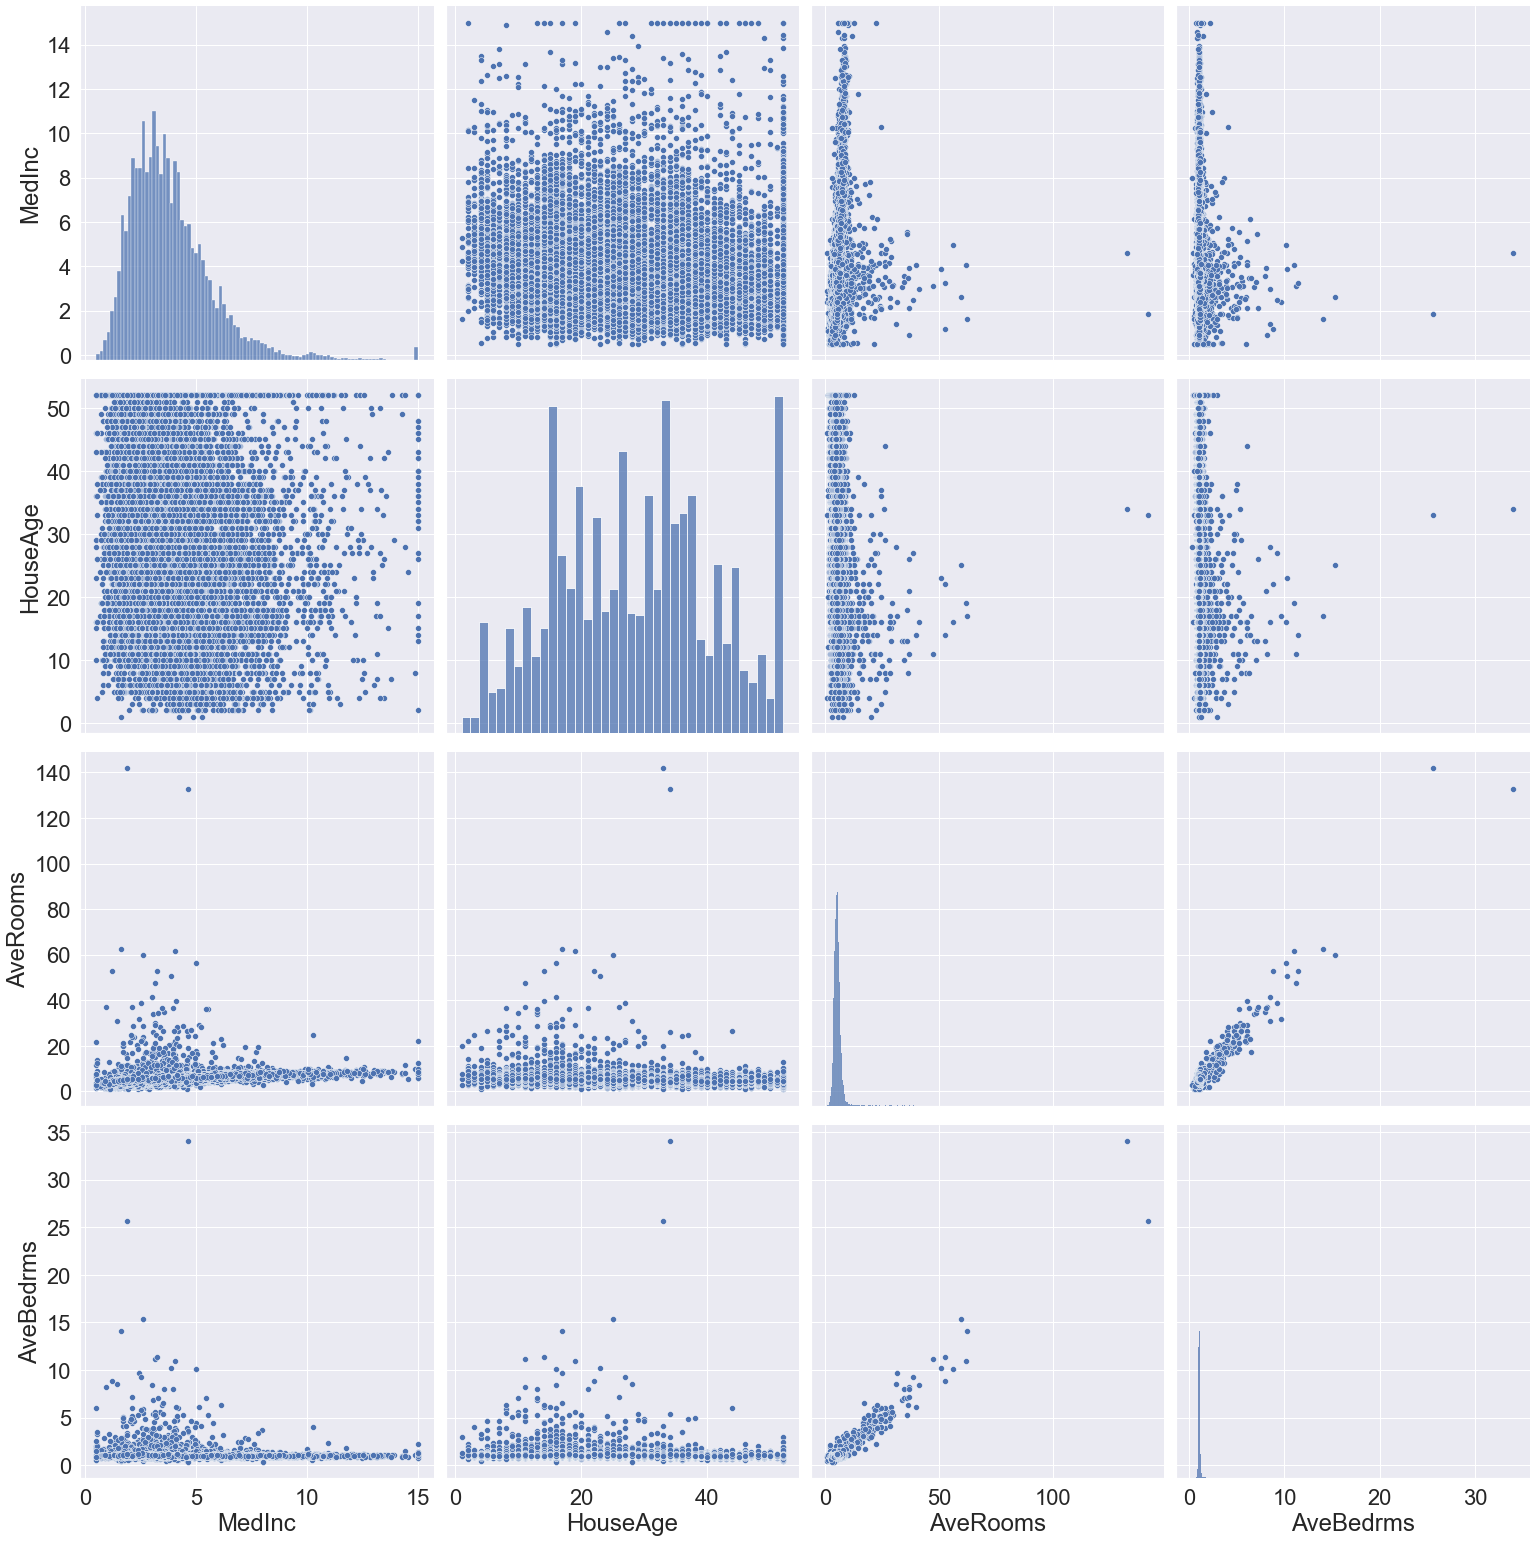

In [33]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(house_prices['data'].iloc[:,0:4], height=5.5)

> yc: see how the pairplot is constructed:

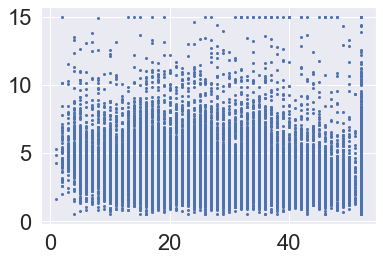

In [48]:
plt.plot(house_prices['data'].iloc[:,1], house_prices['data'].iloc[:,0], 'bo', markersize=2)

### Exercise

Explore different datasets available in the scikitlearn datasets. Create crossplots of the features.

https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets

In [51]:
house_prices = sklearn.datasets.fetch_covtype(as_frame=True)

KeyboardInterrupt: 